###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [1]:
import pandas as pd
import numpy as np

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [8]:
df1=pd.read_csv("/content/college_1.csv")
df1.head(2)
df1.shape

(84, 7)

In [9]:
df2=pd.read_csv("/content/college_2.csv")
df2.head(2)
df2.shape

(35, 9)

In [10]:
df=df1.append(df2,ignore_index=True)
df.head(4)
df.shape

(119, 9)

In [11]:
df.head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [19]:
exceed_expec=df[df["CodeKata Score"]>15000]
exceed_expec.to_csv('Exceeded_expectations.csv')

In [21]:
reached_expec=df[(df["CodeKata Score"]>10000) &(df["CodeKata Score"]<15000)]
reached_expec.to_csv('Reached_expectations.csv')

In [25]:
need_improvement=df[(df["CodeKata Score"]>7000) &(df["CodeKata Score"]<10000)]
need_improvement.to_csv('Needs_Improvement.csv')

In [28]:
unsatisfactory=df[(df["CodeKata Score"]<7000)]
unsatisfactory.to_csv('Unsatisfactory.csv')

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [29]:
df.head(2)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN


In [30]:
df["Previous Geekions"].mean()

3842.3529411764707

In [31]:
df["CodeKata Score"].mean()

4051.764705882353

###### No of students participated 

In [36]:
x=df.shape[0]

In [37]:
print("no.of participated:",x)

no.of participated: 119


###### #Average completion of python course or my_sql or python english or computational thinking

In [41]:
df["python"].nlargest(1)

2    100.0
Name: python, dtype: float64

In [45]:
final_df=df.fillna(0)
final_df.head(2)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,0.0,0.0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,0.0,0.0


In [49]:
python_completion=final_df[final_df["python"]==100]
python_completion.shape

(41, 9)

In [78]:
print("python completion :",	python_completion.shape[0] )
print("overall completion:",final_df.shape[0])
b1=(python_completion.shape[0]/final_df.shape[0])*100
print("average completion:",(python_completion.shape[0]/final_df.shape[0])*100)

python completion : 41
overall completion: 119
average completion: 34.45378151260504


In [67]:
my_sql=final_df[final_df["mysql"]==100]
my_sql.shape

(14, 9)

In [79]:
print("my_sql :",my_sql.shape[0] )
print("overall completion:",final_df.shape[0])
b2=(my_sql.shape[0]/final_df.shape[0])*100
print("average completion:",(my_sql.shape[0]/final_df.shape[0])*100)

my_sql : 14
overall completion: 119
average completion: 11.76470588235294


In [71]:
python_english=final_df[final_df["python_en"]==100]
python_english.shape

(2, 9)

In [81]:
print("python_english :",python_english.shape[0] )
print("overall completion:",final_df.shape[0])
b3=(python_english.shape[0]/final_df.shape[0])*100
print("average completion:",(python_english.shape[0]/final_df.shape[0])*100)

python_english : 2
overall completion: 119
average completion: 1.680672268907563


In [74]:
computational_thinking=final_df[final_df["computational_thinking"]==100]
computational_thinking.shape

(0, 9)

In [84]:
print("computational_thinking :",computational_thinking.shape[0] )
print("overall completion:",final_df.shape[0])
b4=(computational_thinking.shape[0]/final_df.shape[0])*100
print("average completion:",(computational_thinking.shape[0]/final_df.shape[0])*100)

computational_thinking : 0
overall completion: 119
average completion: 0.0


In [86]:
average=b1+b2+b3+b4
average/final_df.shape[0]

0.40251394675517266

In [91]:
Average=final_df.loc[(final_df['python']==100)|(final_df['mysql']==100)|(final_df['python_en']==100)|(final_df['computational_thinking']==100)]
Average.shape

(46, 9)

In [88]:
m=(Average.shape[0]/final_df.shape[0])*100
print("average completion:",m)

average completion: 38.655462184873954


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [92]:
final_df['performance'] = final_df['CodeKata Score'] -final_df['Previous Geekions']
final_df.head(2)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking,performance
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,0.0,0.0,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,0.0,0.0,0


In [93]:
week_performer=final_df.nlargest(3, ['performance'])
week_performer

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking,performance
92,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0,3140
86,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0,2000
102,Narasimhan Y L,-1.0,0.0,4800,6800,Computer Science and Engineering,2000,-1.0,0.0,2000


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [94]:
top_performer=final_df.nlargest(3, ['CodeKata Score'])
top_performer

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking,performance
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,0.0,0.0,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,0.0,0.0,0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,0.0,0.0,0


###### Department wise codekata performence (pie chart)

In [95]:
final_df['Department'].unique()

array(['Computer Science and Engineering',
       'Electronics and Communication Engineering',
       'Electronics and Electrical Engineering'], dtype=object)

In [104]:
cs=final_df[final_df['Department']=='Computer Science and Engineering']
cs.head(2)
cs["CodeKata Score"].mean()

5079.761904761905

In [105]:
ece=final_df[final_df['Department']=='Electronics and Communication Engineering']
ece["CodeKata Score"].mean()

2777.8205128205127

In [106]:
eee=final_df[final_df['Department']=='Electronics and Electrical Engineering']
eee["CodeKata Score"].mean()

3164.705882352941

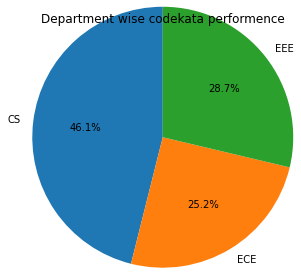

In [111]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([cs["CodeKata Score"].mean(),ece["CodeKata Score"].mean(),eee["CodeKata Score"].mean()])
mylabels = ["CS", "ECE", "EEE"]

plt.pie(y, labels = mylabels, startangle = 90,autopct='%1.1f%%',radius=1.5)
plt.title('Department wise codekata performence')
plt.show() 

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [121]:
cs=df[df["Department"]==("Computer Science and Engineering")]
cs_topper=cs.nlargest(5,["CodeKata Score"])
cs_topper

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
85,Chandru,0.0,0.0,14150,14490,Computer Science and Engineering,340,20.0,0.0
86,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0


In [122]:
ece=df[df["Department"]==("Electronics and Communication Engineering")]
ece_topper=ece.nlargest(5,["CodeKata Score"])
ece_topper

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
87,Bodipudi Harini,-1.0,35.0,10040,10040,Electronics and Communication Engineering,0,0.0,-1.0
91,Gowtham R,-1.0,4.0,8650,8650,Electronics and Communication Engineering,0,60.0,6.0
6,KALAIARASAN K,85.0,47.0,7750,7880,Electronics and Communication Engineering,130,NaN,NaN
98,Praneetha,-1.0,100.0,7170,7730,Electronics and Communication Engineering,560,23.0,-1.0
100,Guhan S,-1.0,35.0,7310,7630,Electronics and Communication Engineering,320,72.0,39.0


In [123]:
eee=df[df["Department"]==("Electronics and Electrical Engineering")]
eee_topper=eee.nlargest(5,["CodeKata Score"])
eee_topper

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
84,ASHOK KUMAR K,100.0,31.0,19400,19400,Electronics and Electrical Engineering,0,0.0,9.0
88,VIINU V P,-1.0,24.0,9150,9150,Electronics and Electrical Engineering,0,100.0,-1.0
92,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
93,Balaji,-1.0,20.0,6170,8160,Electronics and Electrical Engineering,1990,100.0,0.0
96,JPradhap,100.0,0.0,7340,8030,Electronics and Electrical Engineering,690,0.0,0.0


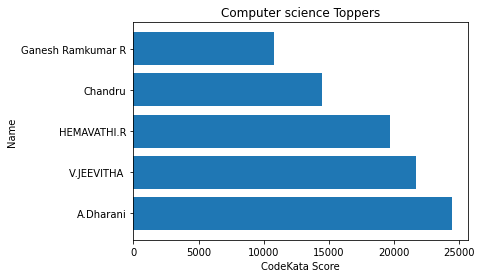

In [124]:
plt.barh(cs_topper['Name'],cs_topper['CodeKata Score'])
plt.title('Computer science Toppers')
plt.xlabel('CodeKata Score')
plt.ylabel('Name')
plt.show()

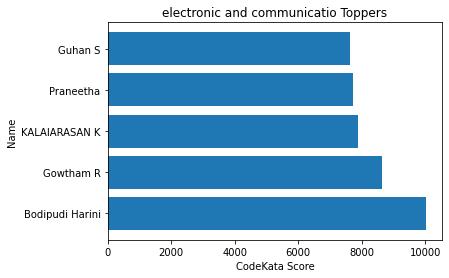

In [125]:
plt.barh(ece_topper['Name'],ece_topper['CodeKata Score'])
plt.title('electronic and communicatio Toppers')
plt.xlabel('CodeKata Score')
plt.ylabel('Name')
plt.show()

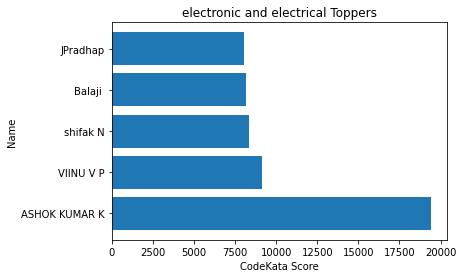

In [126]:
plt.barh(eee_topper['Name'],eee_topper['CodeKata Score'])
plt.title('electronic and electrical Toppers')
plt.xlabel('CodeKata Score')
plt.ylabel('Name')
plt.show()

In [127]:
final_df.to_csv("Final_copy")